# <b>Section 1: Data Exploration</b>

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `numpy`: used for mathematical operations on matrices
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `matplotlib`: used to visualize data

In [895]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Import songs data from 'songs_data.csv' file</b>

First, let's read the Spotify's songs data from `songs_data.tsv` file by using pandas.

In [912]:
songs_df_raw = pd.read_csv('songs_data.tsv', sep='\t')

### <b><u>Step 3</u>: Remove duplicate rows in the raw data</b>

Next, let's check whether the DataFrame has duplicate rows that needs to be removed.

In [913]:
duplicated_rows = songs_df_raw.duplicated().sum()
duplicated_rows

35

So there are 35 rows that are duplicated, these are the rows that we don't need in the DataFrame.

Therefore, we need to drop those 35 rows and see some of the first rows of the dataset.

In [914]:
songs_df = songs_df_raw.drop_duplicates()
songs_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,Speak Your Mind (Deluxe),2018-04-27,72,186986,False,81
1,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"Sam Smith,Kim Petras","uk pop,transpop,pop,dance pop","20747240,825245","87,82",182,Unholy (feat. Kim Petras),2022-09-22,88,156943,False,100
2,4Pbg79cTBu4vgSphoyNq3j,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,2002,2018-04-19,52,186986,False,63
3,2Zc3DlVHtwqAVE4KcdajnN,2022,"Baby Storme,Alex Cain",NaN,"43572,43","34,18",183,2022,2022-04-08,25,192000,False,36
4,65fpYBrI8o2cfrwf2US4gq,Rewrite The Stars,"Zac Efron,Zendaya","pop,dance pop,hollywood,show tunes,post-teen pop","757199,3556331","67,69",183,The Greatest Showman (Original Motion Picture ...,2017-12-08,77,217440,False,72


### <b><u>Step 4</u>: Explore the dataset</b>

In this next step, we will explore the features of the dataset. First, let's check how many rows and columns in the DataFrame.

In [915]:
num_rows, num_cols = songs_df.shape
num_rows, num_cols

(2965, 13)

There are 2965 rows and 13 columns in total.

Next, we need to know what are the columns of the DataFrame and check whether we need to remove any of them.

In [916]:
columns = songs_df.columns
columns

Index(['id', 'name', 'artist', 'genres', 'artist_followers',
       'artist_popularity', 'markets', 'album', 'released_date',
       'album_popularity', 'duration', 'explicit', 'popularity'],
      dtype='object')

To discover the meaning of each column, we can load data from `songs_data_des.csv` file

In [917]:
songs_des_df = pd.read_csv('songs_data_des.csv', on_bad_lines='skip')
songs_des_df

,column name,data type,meaning,example
0,id,string,The Spotify ID of track,3nqQXoyQOWXiESFLlDF1hG
1,name,string,The name of the track,Unholy (feat. Kim Petras)
2,artist,string,The artist(s) of the track,Sam Smith.Kim Petras
3,genres,string,The genres of that artist(s),uk pop.transpop.pop.dance pop
4,artist_followers,string,The number of followers of the artist(s),20747240.825245
5,artist_popularity,string,"""The popularity of the artist(s). The value w...",87.82
6,markets,int,The number of countries which the track is av...,182
7,album,string,The album of the track,Unholy (feat. Kim Petras)
8,released_date,string,The released date of the track,2022-09-22
9,album_popularity,int,"""The popularity of the album.""",88


At the moment, we don't really need to use the feature `explicit` for data exploration. So we will decide to drop it for now.

In [918]:
songs_df.drop('explicit', inplace=True, axis=1, errors='ignore')

Next, we need to recheck the data types of each column.

In [919]:
dtypes = songs_df.dtypes
dtypes

id                   object
name                 object
artist               object
genres               object
artist_followers     object
artist_popularity    object
markets               int64
album                object
released_date        object
album_popularity      int64
duration              int64
popularity            int64
dtype: object

As we can see, there are only 4 numeric categories: `markets`, `album_popularity`, `duration` and `popularity`. The rest of the columns are either string or list types but in DataFrame, string and list are categorized as object.

Let's get the detailed info and number of non-null values of each column.

In [920]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2965 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2965 non-null   object
 1   name               2965 non-null   object
 2   artist             2965 non-null   object
 3   genres             2520 non-null   object
 4   artist_followers   2965 non-null   object
 5   artist_popularity  2965 non-null   object
 6   markets            2965 non-null   int64 
 7   album              2965 non-null   object
 8   released_date      2965 non-null   object
 9   album_popularity   2965 non-null   int64 
 10  duration           2965 non-null   int64 
 11  popularity         2965 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 301.1+ KB


We can notice that there are some null values in genres column, therefore, we need to explore how many values are missing in the dataset

In [921]:
null_cols = songs_df.isnull().sum()
null_cols

id                     0
name                   0
artist                 0
genres               445
artist_followers       0
artist_popularity      0
markets                0
album                  0
released_date          0
album_popularity       0
duration               0
popularity             0
dtype: int64

day la markdown

In [864]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    return c.nunique(dropna=True)

def diff_vals(c):
    return c.dropna().unique()

numeric columns

In [865]:
numeric_cols_des = songs_df[songs_df.describe().columns].agg([missing_ratio, min, max]).round(1)
numeric_cols_des

,markets,album_popularity,duration,popularity
missing_ratio,0.0,0.0,0.0,0.0
min,1.0,0.0,24013.0,0.0
max,183.0,97.0,7994537.0,100.0


day la markdown

<BarContainer object of 3 artists>

<Figure size 1000x2000 with 0 Axes>

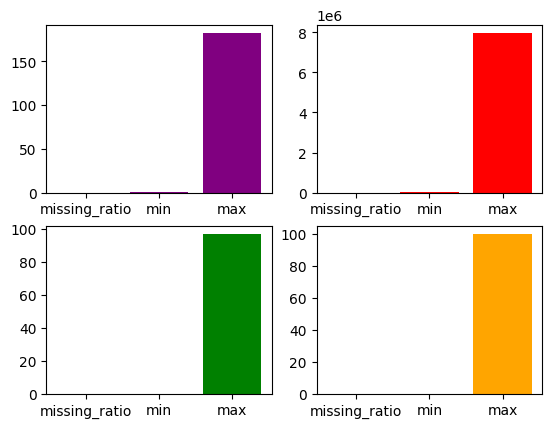

In [867]:
plt.figure(figsize=(10, 20))
_, ax = plt.subplots(2, 2)
ax[0, 0].bar(numeric_cols_des.index, numeric_cols_des['markets'], color = 'purple')
ax[0, 1].bar(numeric_cols_des.index, numeric_cols_des['duration'], color = 'r')
ax[1, 0].bar(numeric_cols_des.index, numeric_cols_des['album_popularity'], color = 'g')
ax[1, 1].bar(numeric_cols_des.index, numeric_cols_des['popularity'], color = 'orange')

categorical columns

In [868]:
songs_df[['genres']].agg([missing_ratio, num_diff_vals, diff_vals]).round(2)

,genres
missing_ratio,15.008432
num_diff_vals,956
diff_vals,"[tropical house,pop,dance pop,pop dance,post-t..."


1. Genres

day la markdown

In [869]:
num_genres = songs_df['genres'].str.split(',').explode().nunique()
num_genres

1064

bar chart

<AxesSubplot: >

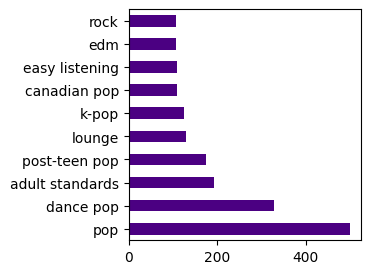

In [870]:
songs_df['genres'].str.split(',').explode().value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='indigo')

2. Artists

day la markdown

In [871]:
num_artists = songs_df['artist'].str.split(',').explode().nunique()
num_artists

2293

<AxesSubplot: >

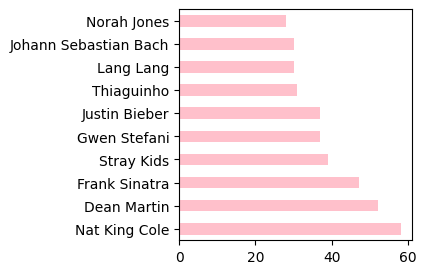

In [872]:
songs_df['artist'].str.split(',').explode().value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='pink')

3. Albums

In [873]:
num_albums = songs_df['album'].nunique()
num_albums

1343

<AxesSubplot: >

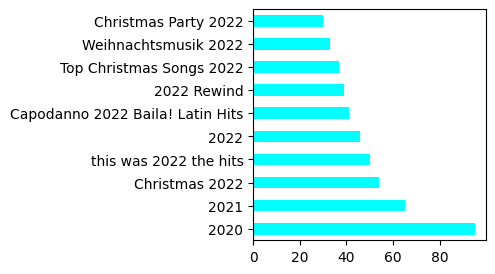

In [874]:
songs_df['album'].value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='cyan')

### <b><u>Step 6</u>: Preprocessing dataset</b>

1. Genres

handle genres

In [875]:
songs_df['genres'] = songs_df['genres'].str.split(',')
songs_df['genres'].fillna('None', inplace=True)

add main genre to dataset

In [876]:
songs_df['main_genre'] = songs_df['genres'].apply(lambda x: x[0] if type(x) == list else x)

2. Artists

handle artists

In [877]:
songs_df['artist'] = songs_df['artist'].str.split(',')

add artists count to dataset

In [878]:
songs_df['artists_count'] = songs_df['artist'].apply(len)

explore min max artist_count

In [879]:
songs_df[['artists_count']].agg([min, max])

,artists_count
min,1
max,39


3. Artist followers

handle artist followers

In [880]:
songs_df['artist_followers'].update(songs_df['artist_followers'].str.split(','))
songs_df['artist_followers'].update(songs_df['artist_followers'].apply(lambda x: list(map(int, x))))

normalizing artist followers

In [881]:
songs_df['artist_followers'] = songs_df['artist_followers'].apply(lambda x: np.sqrt(np.sum(list(map(lambda y: y**2, x)))))
songs_df['artist_followers'] = songs_df['artist_followers'].astype('int64')

4. Artist popularity

handle artist popularity

In [882]:
songs_df['artist_popularity'].update(songs_df['artist_popularity'].str.split(','))
songs_df['artist_popularity'].update(songs_df['artist_popularity'].apply(lambda x: list(map(int, x))))

normalizing artist popularity

In [883]:
songs_df['artist_popularity'] = songs_df['artist_popularity'].apply(lambda x: min(100, np.sqrt(np.sum(list(map(lambda y: y**2, x))))))
songs_df['artist_popularity'] = songs_df['artist_popularity'].astype('int64')

5. Released data

handle released date

In [884]:
songs_df['released_date'] = pd.to_datetime(songs_df['released_date'], format='%Y-%m-%d', errors='coerce')

day la markdown

In [885]:
songs_model_df = songs_df[['artist_followers', 'artist_popularity', 'markets', 'album_popularity', 'duration', 'popularity']]
songs_model_df

,artist_followers,artist_popularity,markets,album_popularity,duration,popularity
0,10228985,76,183,72,186986,81
1,20763646,100,182,88,156943,100
2,10228985,76,183,52,186986,63
3,43572,38,183,25,192000,36
4,3636047,96,183,77,217440,72
...,...,...,...,...,...,...
2995,6535001,85,183,49,146719,33
2996,161325,48,183,36,242705,33
2997,1286591,64,183,43,179774,33
2998,1286591,64,183,43,141008,33


day la markdown

In [886]:
songs_model_df.corr(method='spearman')

,artist_followers,artist_popularity,markets,album_popularity,duration,popularity
artist_followers,1.000000,0.862982,-0.625777,-0.024550,0.045350,-0.170199
artist_popularity,0.862982,1.000000,-0.555605,0.023361,-0.047730,-0.102210
markets,-0.625777,-0.555605,1.000000,0.475937,0.148894,0.564505
album_popularity,-0.024550,0.023361,0.475937,1.000000,0.095183,0.901314
duration,0.045350,-0.047730,0.148894,0.095183,1.000000,0.108222
popularity,-0.170199,-0.102210,0.564505,0.901314,0.108222,1.000000


### Step 7: Advanced exploration on the dataset

day la markdown

<AxesSubplot: >

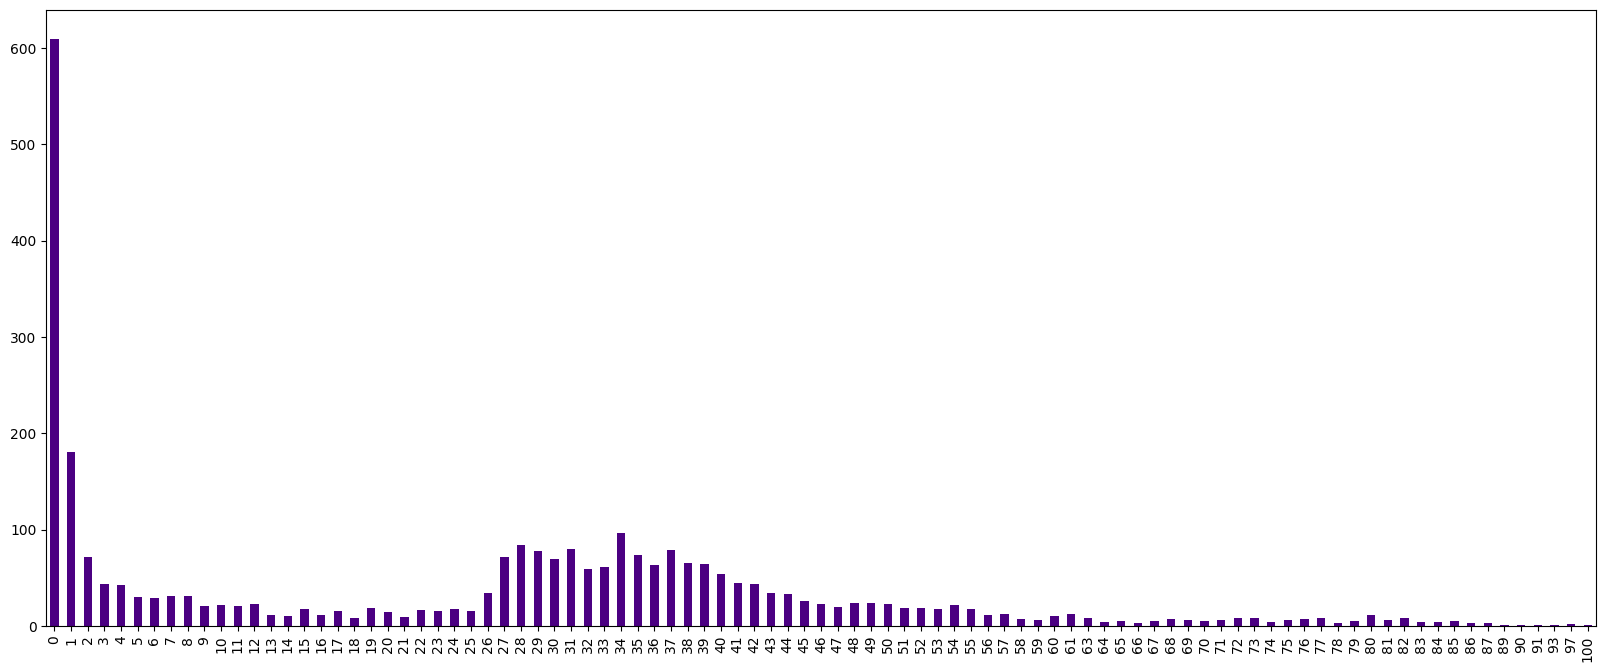

In [893]:
songs_df['popularity'].value_counts().sort_index(ascending=True) \
                    .plot.bar(figsize=(20, 8), color='indigo')

day la markdown

<AxesSubplot: >

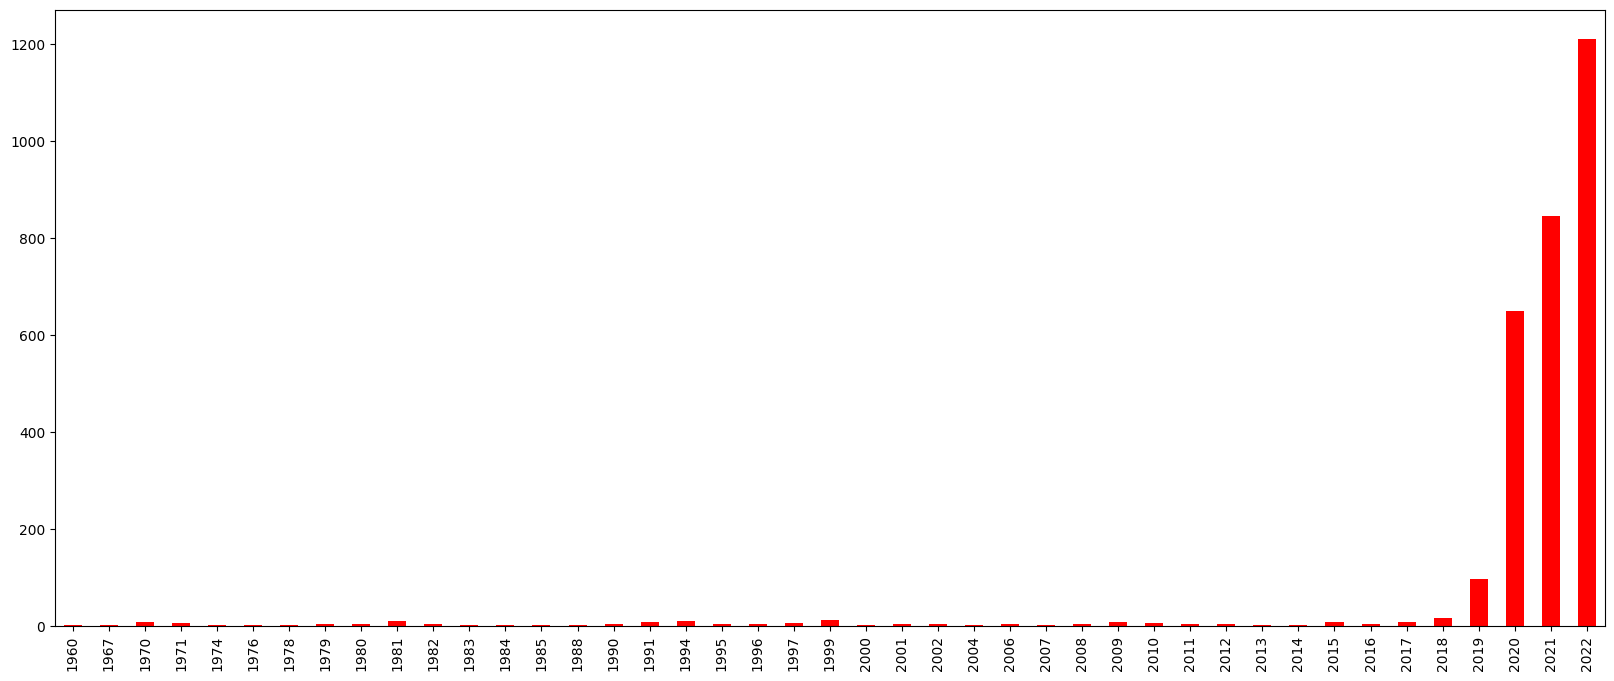

In [894]:
songs_df['released_date'].dt.year.value_counts().sort_index(ascending=True) \
                        .plot.bar(figsize=(20, 8), color='red')

day la markdown

In [889]:
songs_df[songs_df['released_date'].dt.year.between(2020, 2022)]['artist'].explode().value_counts().nlargest(n=5).index.to_list()

['Nat King Cole',
 'Dean Martin',
 'Frank Sinatra',
 'Stray Kids',
 'Justin Bieber']